<a href="https://colab.research.google.com/github/Hehs33/TareasAprendizaje_PUCE/blob/main/2-Ejercicios/01-Mi-segundo-modelo-Plantilla_TomasHidrobo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/01-Mi-segundo-modelo-Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Mi primer modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Tomas Hidrobo &bull; 11/28/2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado parcticar en el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos reales. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Del conjunto de datos disponible [aquí](https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv), se desea predecir la variable `price` en función de las variables `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`.

In [2]:
# Paquetes necesarios
import numpy as np  # Para generación de datos y operaciones numéricas
import pandas as pd  # Para manejo de datos estructurados
import matplotlib.pyplot as plt  # Para visualización de datos
from sklearn.linear_model import LinearRegression  # Para el modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score  # Para evaluación del modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer, OneHotEncoder
from sklearn.decomposition import PCA

---
## <font color='264CC7'> Lectura de Datos </font>


Realiza la lectura de los datos y presenta las primeras filas del conjunto de datos.

In [3]:
URL = "https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv"

df = pd.read_csv(URL)

print("Primeras filas del dataset:")
df.head()


Primeras filas del dataset:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


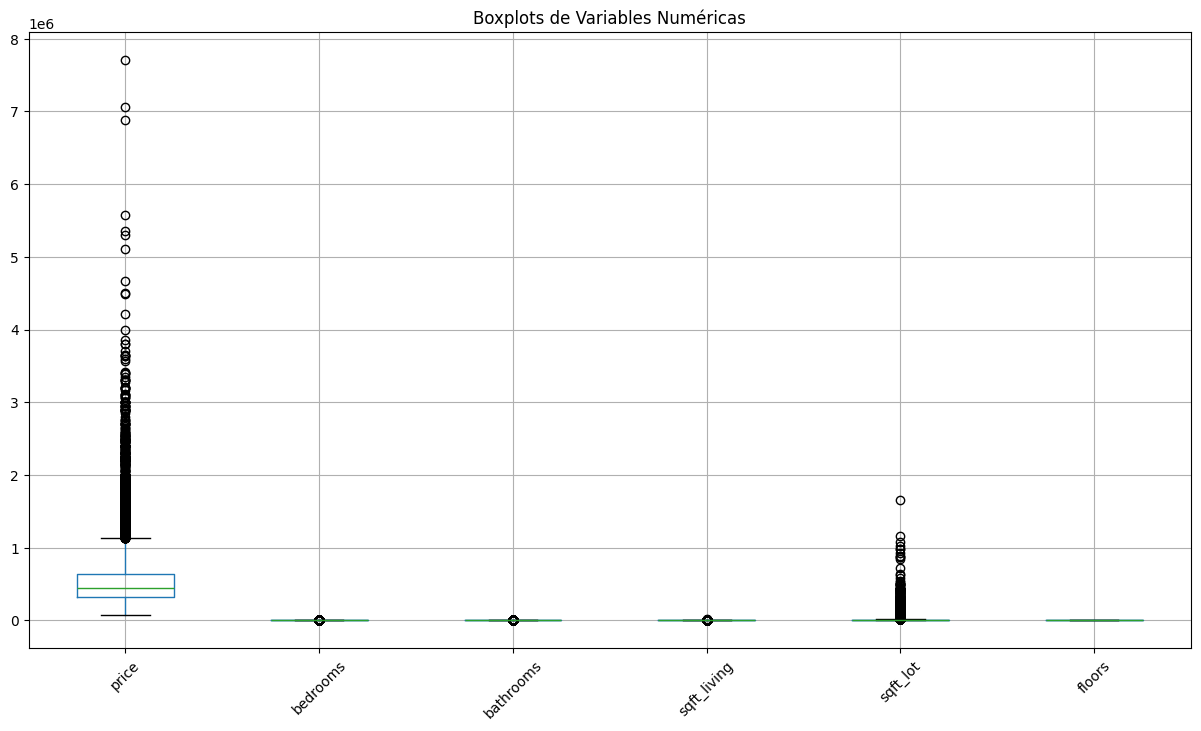

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear boxplots
plt.figure(figsize=(15, 8))
df_modelo.boxplot()
plt.title("Boxplots de Variables Numéricas")
plt.xticks(rotation=45)
plt.show()

In [4]:
# Variable objetivo
y = df['price']

# Variables predictoras
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]

# DataFrame combinado con las variables seleccionadas
df_modelo = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]

display(df_modelo.head())


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,221900.0,3,1.00,1180,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0
2,180000.0,2,1.00,770,10000,1.0
3,604000.0,4,3.00,1960,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0


---
## <font color='264CC7'> Preprocesamiento de datos </font>

Realiza una normalización de los datos, prueba diferentes técnicas y selecciona la que mejor se ajuste a los datos.

In [5]:
# Normalización por el máximo
x_max = X.max()
X_max_normalized = X / x_max
print("Normalización por el máximo:\n")
display(X_max_normalized.head())


Normalización por el máximo:



,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,0.090909,0.12500,0.087149,0.003421,0.285714
1,0.090909,0.28125,0.189808,0.004385,0.571429
2,0.060606,0.12500,0.056869,0.006056,0.285714
3,0.121212,0.37500,0.144756,0.003028,0.285714
4,0.090909,0.25000,0.124077,0.004893,0.285714


In [6]:
# Normalización Min-Max
min_max_scaler = MinMaxScaler()
X_min_max_normalized = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)
print("Normalización Min-Max:\n")
display(X_min_max_normalized.head())

Normalización Min-Max:



,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,0.090909,0.12500,0.067170,0.003108,0.0
1,0.090909,0.28125,0.172075,0.004072,0.4
2,0.060606,0.12500,0.036226,0.005743,0.0
3,0.121212,0.37500,0.126038,0.002714,0.0
4,0.090909,0.25000,0.104906,0.004579,0.0


In [7]:
# Estandarización
standard_scaler = StandardScaler()
X_standardized = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)
print("Estandarización:\n")
display(X_standardized.head())

Estandarización:



,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427
1,-0.398737,0.175607,0.533634,-0.189885,0.936506
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427


---
## <font color='264CC7'> Características y etiquetas </font>

Separa las características y las etiquetas y mostrar la dimensión de cada conjunto.

In [10]:
# Variable objetivo
y = df['price']

# Variables predictoras
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]

# DataFrame combinado con las variables seleccionadas
df_modelo = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]

# Mostrar primeras filas del dataset
display(df_modelo.head())

# Mostrar dimensiones
print("Dimensión de X (características):", X.shape)
print("Dimensión de y (etiqueta):", y.shape)
print("Dimensión del DataFrame usado (df_modelo):", df_modelo.shape)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,221900.0,3,1.00,1180,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0
2,180000.0,2,1.00,770,10000,1.0
3,604000.0,4,3.00,1960,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0


Dimensión de X (características): (21613, 5)
Dimensión de y (etiqueta): (21613,)
Dimensión del DataFrame usado (df_modelo): (21613, 6)


---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [12]:
# División en entrenamiento (70%) y prueba (30%) con random_state = 9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

Revisa la distribución de las etiquetas en los conjuntos de entrenamiento y prueba.

In [13]:
print("Dimensión de X_train:", X_train.shape)
print("Dimensión de X_test:", X_test.shape)
print("Dimensión de y_train:", y_train.shape)
print("Dimensión de y_test:", y_test.shape)

Dimensión de X_train: (15129, 5)
Dimensión de X_test: (6484, 5)
Dimensión de y_train: (15129,)
Dimensión de y_test: (6484,)


---
## <font color='264CC7'> Entrenamiento </font>

Define un modelo de regresión lineal y lo entrena con los datos de entrenamiento.

In [14]:
# Definir el modelo
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

Modelo entrenado correctamente.


---
## <font color='264CC7'> Evaluacion </font>

Realiza la predicciones con el conjunto de prueba y muestra los valores en una tabla.

In [15]:
# Realizar predicciones con el conjunto de prueba
y_pred = modelo.predict(X_test)

# Crear tabla comparativa
tabla_predicciones = pd.DataFrame({
    'Valor real': y_test.values,
    'Predicción': y_pred
})

# Mostrar la tabla
display(tabla_predicciones.head(10))

,Valor real,Predicción
0,262000.0,328565.499400
1,593777.0,386155.810135
2,405000.0,436242.672432
3,366000.0,488547.023933
4,361000.0,373351.666151
5,582000.0,672698.551280
6,970500.0,687460.161526
7,353500.0,874161.617354
8,438924.0,243511.793604
9,349900.0,455865.126142


Calcula el error cuadrático medio.

In [16]:
mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 65587947369.731705


In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

print("\n=== NORMALIZACIÓN POR EL MÁXIMO ===")

# Normalización por el máximo
x_max = X.max()
X_max_normalized = X / x_max

# División train-test
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(
    X_max_normalized, y, test_size=0.3, random_state=9
)

# Modelo
modelo_max = LinearRegression()
modelo_max.fit(X_train_max, y_train_max)

# Predicción
y_pred_max = modelo_max.predict(X_test_max)

# Tabla
tabla_max = pd.DataFrame({
    "Real": y_test_max.values,
    "Pred Máx": y_pred_max
})

display(tabla_max.head())

# MSE
mse_max = mean_squared_error(y_test_max, y_pred_max)
print("MSE Normalización por el máximo:", mse_max)



=== NORMALIZACIÓN POR EL MÁXIMO ===


,Real,Pred Máx
0,262000.0,328565.499400
1,593777.0,386155.810135
2,405000.0,436242.672432
3,366000.0,488547.023933
4,361000.0,373351.666151


MSE Normalización por el máximo: 65587947369.73186


Escribe el error cuadrático medio para cada tipo de normalización:

- Normalización MaxAbsScaler:
- Normalización MinMaxScaler:
- Normalización RobustScaler:
- Normalización StandardScaler:
- Normalización Normalizer:
- Normalización QuantileTransformer:
- Normalización PowerTransformer:

In [19]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Normalización por MaxAbsScaler
scaler = MaxAbsScaler()
X_train_max = scaler.fit_transform(X_train)
X_test_max = scaler.transform(X_test)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train_max, y_train)

# Predicciones
y_pred_max = modelo.predict(X_test_max)

# Tabla
tabla_max = pd.DataFrame({
    "Real": y_test.values,
    "Pred MaxAbs": y_pred_max
})
print("MSE MaxAbsScaler:", mean_squared_error(y_test, y_pred_max))
display(tabla_max.head())


MSE MaxAbsScaler: 65587947369.73187


,Real,Pred MaxAbs
0,262000.0,328565.499400
1,593777.0,386155.810135
2,405000.0,436242.672432
3,366000.0,488547.023933
4,361000.0,373351.666151


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_min = scaler.fit_transform(X_train)
X_test_min = scaler.transform(X_test)

modelo = LinearRegression()
modelo.fit(X_train_min, y_train)

y_pred_min = modelo.predict(X_test_min)

tabla_min = pd.DataFrame({
    "Real": y_test.values,
    "Pred MinMax": y_pred_min
})
print("MSE MinMaxScaler:", mean_squared_error(y_test, y_pred_min))
display(tabla_min.head())


MSE MinMaxScaler: 65587947369.73186


,Real,Pred MinMax
0,262000.0,328565.499400
1,593777.0,386155.810135
2,405000.0,436242.672432
3,366000.0,488547.023933
4,361000.0,373351.666151


In [21]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_rob = scaler.fit_transform(X_train)
X_test_rob = scaler.transform(X_test)

modelo = LinearRegression()
modelo.fit(X_train_rob, y_train)

y_pred_rob = modelo.predict(X_test_rob)

tabla_rob = pd.DataFrame({
    "Real": y_test.values,
    "Pred Robust": y_pred_rob
})
print("MSE RobustScaler:", mean_squared_error(y_test, y_pred_rob))
display(tabla_rob.head())


MSE RobustScaler: 65587947369.73187


,Real,Pred Robust
0,262000.0,328565.499400
1,593777.0,386155.810135
2,405000.0,436242.672432
3,366000.0,488547.023933
4,361000.0,373351.666151


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

modelo = LinearRegression()
modelo.fit(X_train_std, y_train)

y_pred_std = modelo.predict(X_test_std)

tabla_std = pd.DataFrame({
    "Real": y_test.values,
    "Pred Standard": y_pred_std
})
print("MSE StandardScaler:", mean_squared_error(y_test, y_pred_std))
display(tabla_std.head())


MSE StandardScaler: 65587947369.73186


,Real,Pred Standard
0,262000.0,328565.499400
1,593777.0,386155.810135
2,405000.0,436242.672432
3,366000.0,488547.023933
4,361000.0,373351.666151


In [23]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

modelo = LinearRegression()
modelo.fit(X_train_norm, y_train)

y_pred_norm = modelo.predict(X_test_norm)

tabla_norm = pd.DataFrame({
    "Real": y_test.values,
    "Pred Normalizer": y_pred_norm
})
print("MSE Normalizer:", mean_squared_error(y_test, y_pred_norm))
display(tabla_norm.head())


MSE Normalizer: 106098230185.72725


,Real,Pred Normalizer
0,262000.0,427720.779412
1,593777.0,474371.987998
2,405000.0,424117.054632
3,366000.0,527268.553638
4,361000.0,475052.025059


In [24]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='normal')
X_train_quant = scaler.fit_transform(X_train)
X_test_quant = scaler.transform(X_test)

modelo = LinearRegression()
modelo.fit(X_train_quant, y_train)

y_pred_quant = modelo.predict(X_test_quant)

tabla_quant = pd.DataFrame({
    "Real": y_test.values,
    "Pred Quantile": y_pred_quant
})
print("MSE QuantileTransformer:", mean_squared_error(y_test, y_pred_quant))
display(tabla_quant.head())


MSE QuantileTransformer: 82977572419.08113


,Real,Pred Quantile
0,262000.0,352233.122648
1,593777.0,416818.252765
2,405000.0,496199.351126
3,366000.0,523146.034915
4,361000.0,429398.541799


In [25]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
X_train_pow = scaler.fit_transform(X_train)
X_test_pow = scaler.transform(X_test)

modelo = LinearRegression()
modelo.fit(X_train_pow, y_train)

y_pred_pow = modelo.predict(X_test_pow)

tabla_pow = pd.DataFrame({
    "Real": y_test.values,
    "Pred Power": y_pred_pow
})
print("MSE PowerTransformer:", mean_squared_error(y_test, y_pred_pow))
display(tabla_pow.head())


MSE PowerTransformer: 82258373887.32089


,Real,Pred Power
0,262000.0,346242.759492
1,593777.0,416413.087288
2,405000.0,485289.290163
3,366000.0,530824.202996
4,361000.0,406277.149629


Escribe un párrafo sobre qué hace normalización no vista en clase:

- Normalización RobustScaler: Escala los atributos de netrada usando estadisticas robustas a outliers. Resta la mediana de cada caracteristica y luego escaal segun el IQR, se aplica por separado a cada columna o feature de la base de datos.
- Normalización Normalizer: Normaliza cada muestra individualmente para que tenga forma unitaria. Esto significa que cada fila del conjunto de datos se reescala de forma independiente hasta que su norma sea igual a 1.
- Normalización QuantileTransformer: Aplica una transformacion no parametrica basada en cuantiles para remapear la distribucion de cada variable. El resultado es que los datos de cada caracteristica siguen una distribucion uniforme (entre 0 y 1) o normal.
- Normalización PowerTransformer: Aplica transformaciones de potencia a cada feature con el objetivo de hacer que sus datos se aproximen mas a una distribucion normal. Es decir, realiza un ajuste funcional en cada variable para reducir su asimteria y estabilizar su varianza, logrando que la distribucion se vuelva mas simetrica, esto es util para corregir la heterocedaticidad.

---
## <font color='264CC7'> Cross Validation </font>

Realiza validación cruzada con 5 particiones y muestra el error cuadrático medio promedio con la normalización que mejor se ajuste a los datos para confirmar que el modelo no está sobreajustado.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Crear pipeline: normalización + regresión lineal
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('modelo', LinearRegression())
])

# Validación cruzada con 5 particiones
kf = KFold(n_splits=5, shuffle=True, random_state=9)

# MSE (scikit usa valores negativos por convención)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Ejecutar validación cruzada
scores = cross_val_score(pipeline, X, y, cv=kf, scoring=mse_scorer)

# Convertir a MSE positivo
mse_scores = -scores
mse_promedio = mse_scores.mean()
mse_desviacion = mse_scores.std()

print("=== VALIDACIÓN CRUZADA CON STANDARD SCALER (5-FOLD CV) ===")
print("MSE por partición:", mse_scores)
print("MSE promedio:", mse_promedio)
print("Desviación estándar:", mse_desviacion)


=== VALIDACIÓN CRUZADA CON STANDARD SCALER (5-FOLD CV) ===
MSE por partición: [6.50093228e+10 6.43832432e+10 6.46480228e+10 7.22596801e+10
 6.56173699e+10]
MSE promedio: 66383527748.615906
Desviación estándar: 2967076638.7246394
